In [1]:
import pandas as pd
import janitor
from graph_utils import (
    save_mpl_fig,
    plotline, 
    dow_plot
)

FP = '../../readable_news_lf/toi_parsed_all.csv.gz'

### Full sample

In [2]:
df = (pd.read_csv(FP,usecols=["ObjectType", "NumericPubDate"])
      .clean_names()
      .assign(
          date=lambda df: pd.to_datetime(df.numericpubdate, format='%Y%m%d'),
          qtr=lambda df: [dt.to_period('Q') for dt in df.date],
          dow=lambda df:[dt.day_name() for dt in df.date],
      )
     )

nsample = len(df)
df.head(3)

,objecttype,numericpubdate,date,qtr,dow
0,Credit/Acknowledgement,19980224,1998-02-24,1998Q1,Tuesday
1,"['Table of Contents', 'Front Matter']",19960522,1996-05-22,1996Q2,Wednesday
2,Advertisement,19970917,1997-09-17,1997Q3,Wednesday


In [3]:
periods = (2008-1839 + 1)*4 + 1
time_index = pd.date_range("10/01/1838", periods=periods, freq="QS")

df_qtr = (df      
          .groupby(['qtr']).size().reset_index()
          .rename_column(0, 'narticles')
          .sort_values('qtr')
          .set_index('qtr')
          .reindex([dt.to_period('Q')for dt in time_index])      
          .reset_index())
df_qtr.head(3)

,qtr,narticles
0,1838Q4,918.0
1,1839Q1,1576.0
2,1839Q2,1537.0


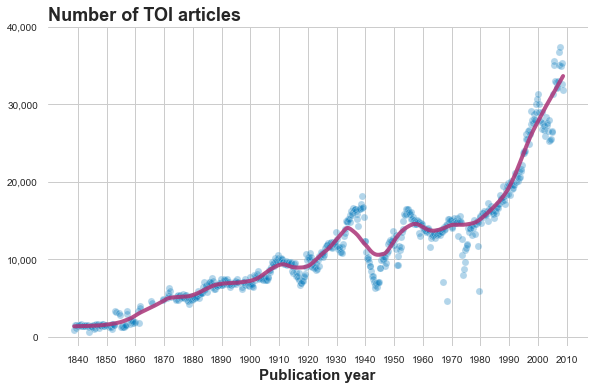

In [4]:
ax = plotline(x=df_qtr.index, y=df_qtr.narticles, 
              bw=0.1,
              xrange=range(5, len(df_qtr)+40, 40),
              xticklabels=range(1840, 2015, 10),
              yrange=range(0,50000,10000), 
              markersize=50,
              tickersize=10,
              title='Number of TOI articles', 
             )    
ax.set_yticklabels([f'{tick:,}' for tick in ax.get_yticks()])
save_mpl_fig('../figures/number_articles_qtr')

In [5]:
ndates = df.date.nunique()
df_dow = (df
          .groupby(['dow']).size().reset_index()
          .rename_column(0, 'narticles')
          .assign(narticles=lambda df: df.narticles/ndates)
         )

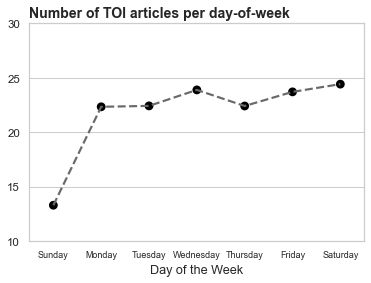

In [6]:
dow_plot(y='narticles', x='dow', data=df_dow)
save_mpl_fig('../figures/number_articles_dow')